# Proje: Güneş Paneli Yerleşiminde Optimum Eğim ve Yön (Genetik Algoritma)

**Adınız:** Sami Yiğit
**Soyadınız:** Uncu
**Okul Numaranız:** 2212721051
**Senaryo:** 1 (Güneş Paneli Optimizasyonu)
**GitHub Repo Bağlantısı:** https://github.com/yyigituncu/gunes-paneli-optimizasyonu

In [1]:
!pip install geneticalgorithm matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=996c737e6aaf9039b2c8234a429f1b22da8d2a2017de1d87bd76adba469a2b75
  Stored in directory: /root/.cache/pip/wheels/ed/94/4a/9ccd71f7284a92e4137b7dd0ce8540c40ea7c2689251504a49
Successfully built func-timeout


Hesaplanıyor...
 The best solution found:
 [15.99059696 87.97622373]

 Objective function:
 -422.2785575550546


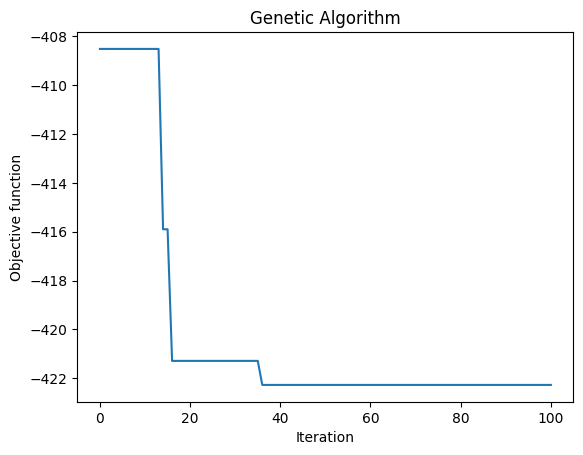


Optimum Eğim (x1): 15.99
Optimum Yön  (x2): 87.98
Maks. Enerji     : 422.28


In [2]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import matplotlib.pyplot as plt

# --- 1. FONKSİYONLAR ---
def fitness_function(X):
    x1 = X[0] # Eğim
    x2 = X[1] # Yön

    # Kısıt: x1 + 0.5*x2 <= 60
    if x1 + (0.5 * x2) > 60:
        return 10000  # Ceza

    # Amaç: y = 6x1 + 4x2 - 0.1x1^2
    y = 6*x1 + 4*x2 - 0.1*(x1**2)
    return -y # Maksimizasyon için eksi ile çarp

# --- 2. AYARLAR ---
varbound = np.array([[10, 45], [15, 90]]) # Değişken sınırları

algorithm_param = {
    'max_num_iteration': 100,
    'population_size': 50,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type':'uniform',
    'max_iteration_without_improv': None
}

# --- 3. ÇALIŞTIRMA ---
model = ga(function=fitness_function, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

print("Hesaplanıyor...")
model.run()

# --- 4. SONUÇLARI YAZDIRMA ---
solution = model.output_dict
best_x1 = solution['variable'][0]
best_x2 = solution['variable'][1]
max_energy = -solution['function']

print("\n" + "="*40)
print(f"Optimum Eğim (x1): {best_x1:.2f}")
print(f"Optimum Yön  (x2): {best_x2:.2f}")
print(f"Maks. Enerji     : {max_energy:.2f}")
print("="*40)